# Clase 9 - ICDP
En esta clase vamos a desarrollar un proyecto que combinará todo lo aprendido en las semanas anteriores, además de presentar nuevos conceptos claves en su camino a la ciencia de datos.

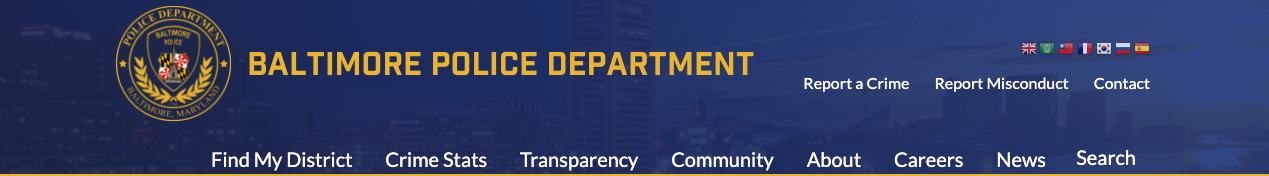

Diccionario de datos:
* NAME: Nombre de la persona
* JOBTITLE: Cargo de la persona
* DEPTID: ID del departamento
* DESCR: Descripción del departamentop
* HIRE_DT: Fecha de contratación
* ANNUAL_RT: Salario anual
* GROSS: Salario Bruto

# **imports**

In [ ]:
import seaborn as sns
import missingno as msno
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
is_outlier = lambda p: (stats.zscore(p) > 3) | (stats.zscore(p) < -3)

In [ ]:
df = #leer csv

## missing values

En esta sección veremos algunos enfoques para lidiar con los valores perdidos.

Luego, vamos a comparar la efectividad de estos enfoques en un conjunto de datos del mundo real.

### imputation `fillna()`

`fillna()` completa los valores faltantes con algún número.

Por ejemplo, podemos completar el valor promedio a lo largo de cada columna.

En este caso, vamos a utilizar el valor promedio para realizar la sustitución. 

!["imputation"](https://imgshare.org/i/LMw63372.png)

### drop values `dropna()`

La opción más simple es eliminar columnas con valores perdidos

!["drop value"](https://imgshare.org/i/yQHB3373.png)

A menos que falten la mayoría de los valores en las columnas eliminadas, el modelo pierde acceso a mucha información (¡potencialmente útil!)}
<br>

<br>
Con este enfoque, como ejemplo extremo, consideremos un conjunto de datos con 10.000 filas, donde a una columna importante le falta una sola entrada. ¡Este enfoque eliminaría la columna por completo!

# **Análisis de datos**

### total pago en el año 2018

### Pago anual promedio en el gobierno de la ciudad de Baltimore

### Pago anual máximo en el gobierno de la ciudad de Baltimore

### Pago anual mínimo en el gobierno de la ciudad de Baltimore

### Detalles del empleado con el salario anual más alto en el gobierno de la ciudad de Baltimore

### Detalles del empleado con el salario bruto más bajo en el gobierno de la ciudad de Baltimore

### Salario promedio anual y salario bruto promedio por puesto de trabajo en el gobierno de la ciudad de Baltimore

### Número de puestos de trabajo únicos en el gobierno de la ciudad de Baltimore

### Número de departamentos del gobierno de la ciudad de Baltimore

### Recuento de empleados por puesto de trabajo en el gobierno de la ciudad de Baltimore

### Diez trabajos más comunes en el gobierno de la ciudad de Baltimore

### Diez trabajos menos comunes en el gobierno de la ciudad de Baltimore

# Ejercicios para hacer en casa

### Salario bruto promedio en el gobierno de la ciudad de Baltimore

### Pago bruto máximo en el gobierno de la ciudad de Baltimore

### Pago bruto mínimo en el gobierno de la ciudad de Baltimore

### Detalles del empleado con el salario bruto más alto en el gobierno de la ciudad de Baltimore

### Detalles del empleado con el salario anual más bajo en el gobierno de la ciudad de Baltimore

### Salario anual promedio y salario bruto promedio por departamento en el gobierno de la ciudad de Baltimore

### Lista de títulos de trabajo únicos en el gobierno de la ciudad de Baltimore

### Lista de departamentos únicos en el gobierno de la ciudad de Baltimore

### Recuento de empleados por departamento en el gobierno de la ciudad de Baltimore

### Diez departamentos principales por número de empleados en el gobierno de la ciudad de Baltimore

### Los diez últimos departamentos por número de empleados en el gobierno de la ciudad de Baltimore

# **Analizando variables categóricas**

## `NAME`

In [ ]:
len(df["NAME"].unique())

In [ ]:
df["NAME"].value_counts().sort_values(ascending=False).head().plot(kind="barh")

## todas las columnas

# **Usando algunos plots**

## `TITLE`

### count plot

In [ ]:
gp = df["JOBTITLE"].value_counts()

In [ ]:
gp = df.groupby(["JOBTITLE"])["ID"].count()

In [ ]:
gp.sort_values(ascending=False).head(15)

In [ ]:
gp.sort_values(ascending=False).head(15).plot(kind="barh");

### pie chart

In [ ]:
gp.sort_values(ascending=False).head(15).plot(kind="pie");

## Salary (`ANNUAL_RT` & `GROSS`)

### histogram

In [ ]:
df["ANNUAL_RT"].plot(kind="hist")

In [ ]:
df["GROSS"].plot(kind="hist")

In [ ]:
df["ANNUAL_RT"].plot(kind="hist")
df["GROSS"].plot(kind="hist")

### kde plot

In [ ]:
df["ANNUAL_RT"].plot(kind="kde")
df["GROSS"].plot(kind="kde")

## `HIRE_DT`

### analizando timestamp

#### Año com más contrataciones

#### mes com más contrataciones

#### dia com más contrataciones

# **Data Preparation**

## `GROSS`

### extrayendo outliers

In [ ]:
df.loc[is_outlier(df["GROSS"]),"GROSS"] = np.mean(df["GROSS"])

## `DESCR`

### extrayendo valores de un texto

#### posicional

#### regex

In [ ]:
df["DESCR_ID"] = df["DESCR"].str.extract("\(([\w\d]+)\)$")

In [ ]:
df["DESCR_ID"].value_counts()

In [ ]:
df["DESCR_COUNCIL_F"] = df["DESCR"].str.contains("Council")

In [ ]:
df["DESCR_COUNCIL_F"].sum()/len(df["DESCR_COUNCIL_F"])

## `NAME`

### data split

#### ¿Cuáles son las familias más comunes?

#### ¿Cuáles son las familias más poderosas?

## `JOBTITLE`

En el mundo de las bases de datos, la cardinalidad se refiere al número de valores únicos contenidos en una columna o campo en particular de una base de datos.

En Data Science, este es uno de los problemas más comunes que encontramos (demasiados valores únicos).

https://medium.com/analytics-vidhya/how-handle-high-cardinality-d889ca61b6a6

### Dummy encoder (high cardinality)

- Dummy Encoder : Este método consiste en crear n nuevas variables de
{0, 1}. Este método no es muy práctico y el tiempo de procesamiento aumentará significativamente.

## `DEPTID`

### Dummy encoder `get_dummies()`

In [ ]:
df["DEPTID_PREFIX"] = df.DEPTID.str[0]

In [ ]:
df["DEPTID_PREFIX"].value_counts().plot(kind="barh")

In [ ]:
df_dummies = pd.get_dummies(df["DEPTID_PREFIX"], "DEPTID_PREFIX_")

In [ ]:
df = pd.concat([df.reset_index(drop=True),df_dummies.reset_index(drop=True)], axis=1)

In [ ]:
df.head()